### Instructor Demo: Returns

This program reads daily stock data from a CSV, trims extraneous columns, converts date strings to datetime objects, sets the datetimes as the index, and calculates and plots returns for a specified date range.

Equation: $r=\frac{{p_{t}} - {p_{0}}}{p_{0}}$

Where $r$ is return on investment, ${p_{t}}$ is the price at time $t$, and ${p_{0}}$ is the initial price

In [10]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSV in as DataFrame

In [11]:
# Read in the CSV as a DataFrame
path_file = Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/03-Python-Pandas/2/Activities/10-Ins_Returns/Resources/sp500_stock_data.csv")
sp500_csv_data = pd.read_csv(path_file)
sp500_csv_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-02,1885.300049,1891.329956,1878.500000,1881.140015,1881.140015,3159560000
1,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
2,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
3,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
4,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000


### View Summary Statistics

In [12]:
# Use the 'describe()' function
sp500_csv_data.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
unique,1258,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-05-02,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2316.801637,2326.829332,2305.725223,2317.082948,2317.082948,3.596083e+09
std,NaN,317.895587,318.579627,317.124199,317.705702,317.705702,6.939543e+08
min,NaN,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.349780e+09
25%,NaN,2057.875000,2067.634888,2044.870025,2058.322449,2058.322449,3.188478e+09
50%,NaN,2179.030029,2184.969971,2172.895019,2180.639893,2180.639893,3.504925e+09
75%,NaN,2636.292481,2652.804931,2612.815063,2636.575012,2636.575012,3.893518e+09


### Drop Extra Columns

In [ ]:
# Drop unnecessary columns
sp500_csv_data.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)
sp500_csv_data.head(10)

### Set Date as Index

In [16]:
# Set the date as the index to the DataFrame
sp500_csv_data.set_index(pd.to_datetime(sp500_csv_data["Date"], infer_datetime_format=True), inplace=True)
sp500_csv_data.head(10)

,Date,Adj Close
Date,,
2014-05-02,2014-05-02,1881.140015
2014-05-05,2014-05-05,1884.660034
2014-05-06,2014-05-06,1867.719971
2014-05-07,2014-05-07,1878.209961
2014-05-08,2014-05-08,1875.630005
2014-05-09,2014-05-09,1878.479980
2014-05-12,2014-05-12,1896.650024
2014-05-13,2014-05-13,1897.449951
2014-05-14,2014-05-14,1888.530029


### Drop Extra Date Column

In [ ]:
# Drop the extra date column
sp500_csv_data.drop(columns=["Date"], inplace=True)
sp500_csv_data.head()

### Plot Daily Close

<AxesSubplot:xlabel='Date'>

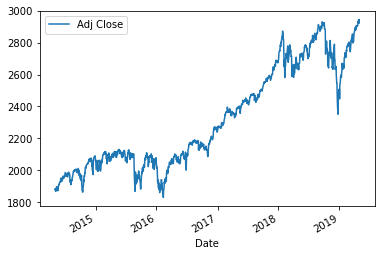

In [38]:
# Plot the daily closing stock price of the S&P 500 over the last 5 years
sp500_csv_data.plot()

### Calculate Daily Returns (Method 1)

Equation: $r=\frac{{p_{t}} - {p_{t-1}}}{p_{t-1}}$

Where $r$ is daily returns, ${p_{t}}$ is the price at time $t$, and ${p_{t-1}}$ is the price at $t-1$ (offset by 1).

In [23]:
# Calculate the daily return using the 'shift()' function
daily_return = (sp500_csv_data - sp500_csv_data.shift(1)) / sp500_csv_data.shift(1)
daily_return.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


### Calculate Daily Returns (Method 2)

In [24]:
# Calculate the daily return using the 'pct_change()' function
daily_return = sp500_csv_data.pct_change()
daily_return.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


### Plot Daily Returns

<AxesSubplot:xlabel='Date'>

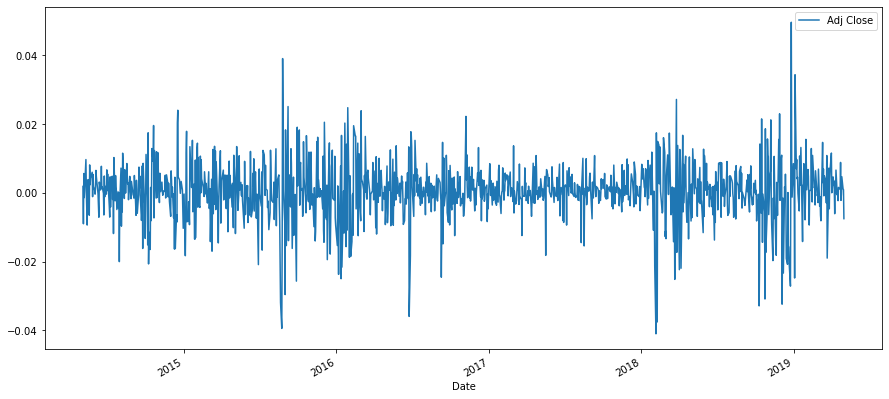

In [30]:
# Plot the daily returns of the S&P 500 over the last 5 years
daily_return.plot(figsize=(15,7))

### Calculate Cumulative Returns

In [31]:
# Calculate the cumulative returns using the 'cumprod()' function
cum_return = (1+daily_return).cumprod()
cum_return.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,1.001871
2014-05-06,0.992866
2014-05-07,0.998442
2014-05-08,0.997071


### Plot Cumulative Returns

<AxesSubplot:xlabel='Date'>

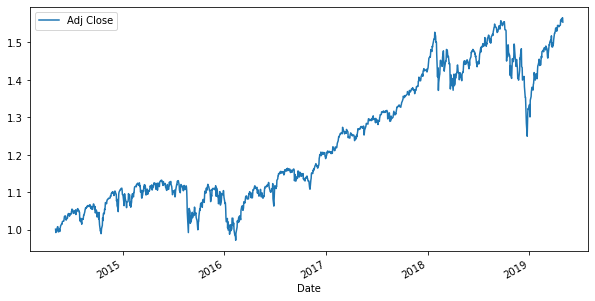

In [33]:
# Plot the daily returns of the S&P 500 over the last 5 years
cum_return.plot(figsize=(10,5))